In [2]:
# install pandas 
import pandas as pd
# install matplotlib
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Property_Assessment_Data_(Current_Calendar_Year)_20251030.csv')

data.head()

C:\Users\dmouris\AppData\Local\Temp\ipykernel_19640\3923736313.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Property_Assessment_Data_(Current_Calendar_Year)_20251030.csv')


,Account Number,Suite,House Number,Street Name,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Tax Class,Garage,Assessment Class 1,Assessment Class 2,Assessment Class 3,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Latitude,Longitude,Point Location
0,4058129,NaN,870.0,ABBOTTSFIELD ROAD NW,2010.0,ABBOTTSFIELD,Métis,150000,Residential,N,RESIDENTIAL,NaN,NaN,100,NaN,NaN,53.576329,-113.392304,POINT (-113.39230350026378 53.57632901357068)
1,4058137,NaN,872.0,ABBOTTSFIELD ROAD NW,2010.0,ABBOTTSFIELD,Métis,149500,Residential,N,RESIDENTIAL,NaN,NaN,100,NaN,NaN,53.576329,-113.392304,POINT (-113.39230350026378 53.57632901357068)
2,4058145,NaN,874.0,ABBOTTSFIELD ROAD NW,2010.0,ABBOTTSFIELD,Métis,151500,Residential,N,RESIDENTIAL,NaN,NaN,100,NaN,NaN,53.576329,-113.392304,POINT (-113.39230350026378 53.57632901357068)
3,4058152,NaN,876.0,ABBOTTSFIELD ROAD NW,2010.0,ABBOTTSFIELD,Métis,147000,Residential,N,RESIDENTIAL,NaN,NaN,100,NaN,NaN,53.576329,-113.392304,POINT (-113.39230350026378 53.57632901357068)
4,4058160,NaN,878.0,ABBOTTSFIELD ROAD NW,2010.0,ABBOTTSFIELD,Métis,153500,Residential,N,RESIDENTIAL,NaN,NaN,100,NaN,NaN,53.576329,-113.392304,POINT (-113.39230350026378 53.57632901357068)


In [4]:
residential_data = data[data["Tax Class"] == "Residential"]

residential_data.shape

(403864, 19)

In [34]:
houses_only = data[data["Assessment Class 1"] == "RESIDENTIAL"]


houses_only = houses_only[houses_only["Assessment Class 2"] == "RESIDENTIAL"].sort_values(by="Assessed Value", ascending=False)
houses_only = houses_only[houses_only["Assessment Class 3"] == "RESIDENTIAL"].sort_values(by="Assessed Value", ascending=False)

top_6_most_expensive = houses_only.sort_values(by="Assessed Value", ascending=False)[:6]
# sort values sorts
# the [:6] you can "chain" this together to get the first 6 values

# let's take a look at the top 10 in top_6_most_expensive (there's only 6) 
top_6_most_expensive.head(10)
# as a reminder head is a "viewing function" it's going show the first 10 but if there's only 6 it'll show 6

,Account Number,Suite,House Number,Street Name,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Tax Class,Garage,Assessment Class 1,Assessment Class 2,Assessment Class 3,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Latitude,Longitude,Point Location
428342,1070010,NaN,3303.0,184 STREET SW,NaN,WINDERMERE AREA,NaN,2202500,Residential,N,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,52,45.0,2.0,53.404852,-113.633066,POINT (-113.63306624877896 53.40485170937839)
249871,1067602,NaN,3611.0,66 STREET SW,6667.0,MATTSON,Karhiio,2036500,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,54,44.0,1.0,53.398244,-113.438253,POINT (-113.43825306503709 53.39824360820009)
320683,1189125,NaN,20415.0,33 STREET NE,2690.0,RURAL NORTH EAST SOUTH STURGEON,Dene,1293500,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,74,17.0,8.0,53.669416,-113.293388,POINT (-113.29338826958002 53.66941617748728)
128887,10884979,NaN,4815.0,80 STREET SW,8885.0,EDMONTON SOUTH CENTRAL EAST,Karhiio,1224000,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,58,40.0,1.0,53.387686,-113.451823,POINT (-113.45182288640035 53.38768647631731)
128334,1103282,NaN,1821.0,232 AVENUE NE,2681.0,EDMONTON ENERGY AND TECHNOLOGY PARK,Dene,1215000,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,50,48.0,2.0,53.690723,-113.317382,POINT (-113.31738215890358 53.69072339302377)
128740,10884920,NaN,16410.0,73 AVENUE SW,8887.0,EDMONTON SOUTH CENTRAL,Ipiihkoohkanipiaohtsi,1164000,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,86,7.0,6.0,53.368510,-113.604224,POINT (-113.60422396519937 53.36850970137673)


In [35]:
# let's create a better address by creating a new column on our dataframe
top_6_most_expensive["Property Address"] = top_6_most_expensive["House Number"].astype('str') \
        + " " + top_6_most_expensive["Street Name"].astype('str')
# note \  # continues next line
# note if you scroll to the end here you get the column that we've created (that's on the head)
top_6_most_expensive.head()

,Account Number,Suite,House Number,Street Name,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Tax Class,Garage,Assessment Class 1,Assessment Class 2,Assessment Class 3,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Latitude,Longitude,Point Location,Property Address
428342,1070010,NaN,3303.0,184 STREET SW,NaN,WINDERMERE AREA,NaN,2202500,Residential,N,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,52,45.0,2.0,53.404852,-113.633066,POINT (-113.63306624877896 53.40485170937839),3303.0 184 STREET SW
249871,1067602,NaN,3611.0,66 STREET SW,6667.0,MATTSON,Karhiio,2036500,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,54,44.0,1.0,53.398244,-113.438253,POINT (-113.43825306503709 53.39824360820009),3611.0 66 STREET SW
320683,1189125,NaN,20415.0,33 STREET NE,2690.0,RURAL NORTH EAST SOUTH STURGEON,Dene,1293500,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,74,17.0,8.0,53.669416,-113.293388,POINT (-113.29338826958002 53.66941617748728),20415.0 33 STREET NE
128887,10884979,NaN,4815.0,80 STREET SW,8885.0,EDMONTON SOUTH CENTRAL EAST,Karhiio,1224000,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,58,40.0,1.0,53.387686,-113.451823,POINT (-113.45182288640035 53.38768647631731),4815.0 80 STREET SW
128334,1103282,NaN,1821.0,232 AVENUE NE,2681.0,EDMONTON ENERGY AND TECHNOLOGY PARK,Dene,1215000,Residential,Y,RESIDENTIAL,RESIDENTIAL,RESIDENTIAL,50,48.0,2.0,53.690723,-113.317382,POINT (-113.31738215890358 53.69072339302377),1821.0 232 AVENUE NE


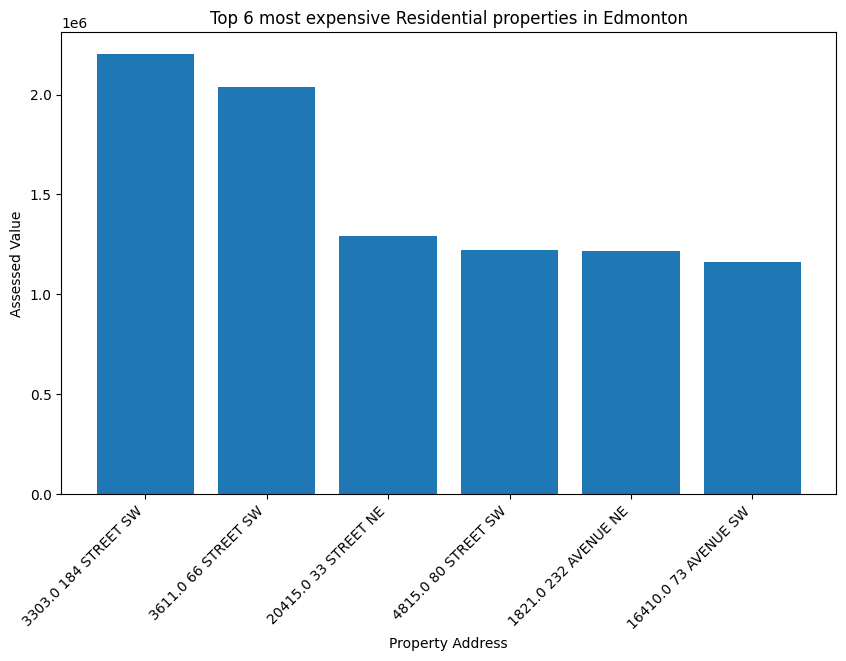

In [36]:
# matplotlib

plt.figure(figsize=(10,6))
plt.bar(top_6_most_expensive["Property Address"], top_6_most_expensive["Assessed Value"])
plt.xlabel("Property Address")
plt.ylabel("Assessed Value")
plt.title("Top 6 most expensive Residential properties in Edmonton")
plt.xticks(rotation=45, ha='right')
plt.show() # this is goign to show the chart.

In [37]:
# lets' see what kind of tax classes there so that we know what's going on here.


